<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/Udesha-/LSTM_Multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler , StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] =[10,8]
mpl.rcParams['axes.grid']= False

In [99]:
df = pd.read_csv('https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/August-2021%20Mannar%20Wind%20Data1.csv')
df = df.rename(columns = {'TimeStamp': 'Date & Time', 'Average  Wind Speed(m/s)': 'Wind Speed (m/s)', 'Average  Wind Dirction(deg)':'Wind Direction(deg)','Average Active Power(MW)':'Active Power(MW)'}, inplace = False)
df=df[['Date & Time','Active Power(MW)','Wind Speed (m/s)','Wind Direction(deg)']]
# aaa=df.head(471)
df=df.tail(3000)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 1409 to 4408
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date & Time          3000 non-null   object 
 1   Active Power(MW)     3000 non-null   float64
 2   Wind Speed (m/s)     3000 non-null   float64
 3   Wind Direction(deg)  3000 non-null   float64
dtypes: float64(3), object(1)
memory usage: 93.9+ KB


In [102]:
df['Date & Time'] = pd.to_datetime(df['Date & Time'], format="%m/%d/%Y %H:%M")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5253b2a9d0>,
      dtype=object)

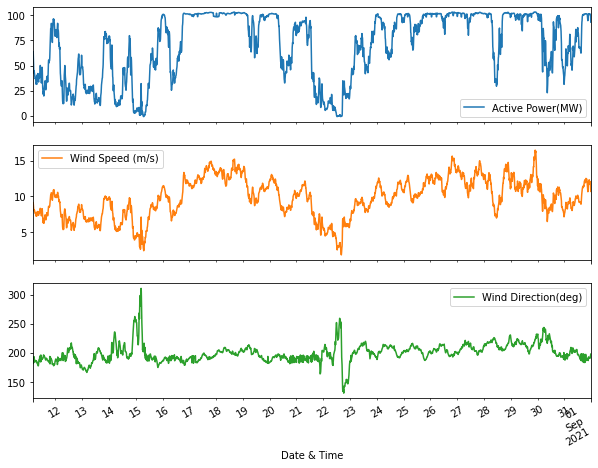

In [103]:
df.set_index('Date & Time')[['Active Power(MW)','Wind Speed (m/s)','Wind Direction(deg)']].plot(subplots=True)

In [104]:
df_input=df[['Active Power(MW)','Wind Speed (m/s)','Wind Direction(deg)']]
df_input

,Active Power(MW),Wind Speed (m/s),Wind Direction(deg)
1409,63.82,9.11,182.22
1410,56.68,8.75,182.96
1411,48.38,8.31,184.02
1412,44.54,8.10,183.47
1413,42.52,7.97,193.59
...,...,...,...
4404,100.45,11.62,195.08
4405,98.01,11.16,196.36
4406,93.11,10.66,198.02
4407,93.68,10.90,196.96


In [105]:
df_input.describe()

,Active Power(MW),Wind Speed (m/s),Wind Direction(deg)
count,3000.000000,3000.000000,3000.000000
mean,70.951417,9.801997,200.091047
std,32.700857,2.726264,16.037804
min,-0.760000,1.810000,130.840000
25%,44.447500,7.950000,190.670000
50%,83.710000,9.970000,198.440000
75%,101.042500,11.932500,207.780000
max,103.420000,16.450000,311.140000


In [106]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)

In [107]:
data_scaled

array([[0.61988865, 0.49863388, 0.2849695 ],
       [0.55135343, 0.47404372, 0.28907377],
       [0.47168362, 0.44398907, 0.29495286],
       ...,
       [0.90103667, 0.6045082 , 0.37260122],
       [0.90650797, 0.62090164, 0.36672213],
       [0.90737186, 0.62431694, 0.37071547]])

In [108]:
features=data_scaled
target=data_scaled[:,0]
#target

In [109]:
TimeseriesGenerator(features,target,length=5,sampling_rate=1,batch_size=1)[0]

(array([[[0.61988865, 0.49863388, 0.2849695 ],
         [0.55135343, 0.47404372, 0.28907377],
         [0.47168362, 0.44398907, 0.29495286],
         [0.43482434, 0.42964481, 0.29190238],
         [0.41543482, 0.42076503, 0.34803106]]]), array([0.4359762]))

In [110]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.20,random_state=123,shuffle=False)

In [111]:
x_train.shape

(2400, 3)

In [112]:
x_test.shape

(600, 3)

In [113]:
win_length=10
batch_size=10
num_feature=3
train_generator = TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [114]:
train_generator[0]

(array([[[0.61988865, 0.49863388, 0.2849695 ],
         [0.55135343, 0.47404372, 0.28907377],
         [0.47168362, 0.44398907, 0.29495286],
         [0.43482434, 0.42964481, 0.29190238],
         [0.41543482, 0.42076503, 0.34803106],
         [0.4359762 , 0.42896175, 0.33577371],
         [0.42368977, 0.42827869, 0.32434831],
         [0.41629871, 0.42486339, 0.31225735],
         [0.40353235, 0.41803279, 0.30848586],
         [0.38366289, 0.40710383, 0.30038824]],
 
        [[0.55135343, 0.47404372, 0.28907377],
         [0.47168362, 0.44398907, 0.29495286],
         [0.43482434, 0.42964481, 0.29190238],
         [0.41543482, 0.42076503, 0.34803106],
         [0.4359762 , 0.42896175, 0.33577371],
         [0.42368977, 0.42827869, 0.32434831],
         [0.41629871, 0.42486339, 0.31225735],
         [0.40353235, 0.41803279, 0.30848586],
         [0.38366289, 0.40710383, 0.30038824],
         [0.38337493, 0.40368852, 0.31136994]],
 
        [[0.47168362, 0.44398907, 0.29495286],
       

In [115]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64,input_shape=(win_length,num_feature),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.6))
model.add(tf.keras.layers.LSTM(32,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.6))
model.add(tf.keras.layers.Dropout(0.1))
# model.add(tf.keras.layers.LSTM(64,return_sequences=True))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.6))
# model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.LSTM(16,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1))

In [116]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 64)            17408     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 10, 64)            0         
                                                                 
 lstm_7 (LSTM)               (None, 10, 32)            12416     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 10, 32)            0         
                                                                 
 dropout_4 (Dropout)         (None, 10, 32)            0         
                                                                 
 lstm_8 (LSTM)               (None, 16)                3136      
                                                                 
 dropout_5 (Dropout)         (None, 16)               

In [117]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2,mode="min")
model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])
history=model.fit_generator(train_generator,epochs=50,validation_data=test_generator,shuffle=False,callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


239/239 [==============================] - 11s 22ms/step - loss: 0.0359 - mean_absolute_error: 0.1455 - val_loss: 0.0199 - val_mean_absolute_error: 0.0939
Epoch 2/50
239/239 [==============================] - 4s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.1067 - val_loss: 0.0146 - val_mean_absolute_error: 0.0758
Epoch 3/50
239/239 [==============================] - 4s 16ms/step - loss: 0.0173 - mean_absolute_error: 0.1014 - val_loss: 0.0131 - val_mean_absolute_error: 0.0719
Epoch 4/50
239/239 [==============================] - 4s 16ms/step - loss: 0.0149 - mean_absolute_error: 0.0924 - val_loss: 0.0138 - val_mean_absolute_error: 0.0763
Epoch 5/50
239/239 [==============================] - 4s 16ms/step - loss: 0.0136 - mean_absolute_error: 0.0905 - val_loss: 0.0108 - val_mean_absolute_error: 0.0652
Epoch 6/50
239/239 [==============================] - 4s 16ms/step - loss: 0.0130 - mean_absolute_error: 0.0881 - val_loss: 0.0114 - val_mean_absolute_error: 0.0663
Epoch 7/50
239/239 [

In [118]:
model.evaluate_generator(test_generator,verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.005246093962341547, 0.05212604999542236]

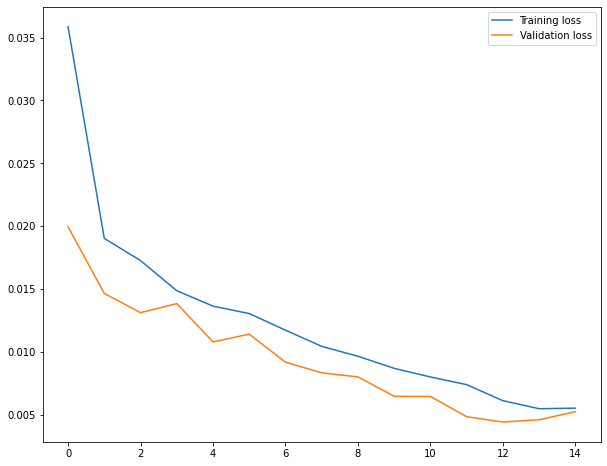

In [119]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [120]:
predictions=model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [121]:
predictions.shape[0]

590

In [122]:
predictions

array([[1.0218772 ],
       [1.0199668 ],
       [1.0200455 ],
       [1.019172  ],
       [1.0179077 ],
       [1.017556  ],
       [1.0164977 ],
       [1.0167296 ],
       [1.016033  ],
       [1.0140818 ],
       [1.010775  ],
       [1.0069114 ],
       [1.0036868 ],
       [1.0030695 ],
       [1.0051469 ],
       [1.0057007 ],
       [1.0059061 ],
       [1.0061358 ],
       [1.0052092 ],
       [1.0058247 ],
       [1.0046465 ],
       [1.0025407 ],
       [0.9986116 ],
       [0.9961325 ],
       [0.997112  ],
       [0.9976528 ],
       [0.99609417],
       [0.99449867],
       [0.9928244 ],
       [0.98865813],
       [0.9816502 ],
       [0.9732963 ],
       [0.9668686 ],
       [0.96702445],
       [0.97715443],
       [0.98433316],
       [0.98285645],
       [0.98115057],
       [0.98811466],
       [0.9969984 ],
       [1.0038464 ],
       [1.0067073 ],
       [1.0022168 ],
       [0.99626917],
       [0.9954096 ],
       [1.0001315 ],
       [1.0016855 ],
       [1.000

In [123]:
#y_test

In [124]:
x_test

array([[0.99644845, 0.8989071 , 0.40682196],
       [0.99472068, 0.87226776, 0.39922352],
       [0.99395277, 0.86338798, 0.39584027],
       ...,
       [0.90103667, 0.6045082 , 0.37260122],
       [0.90650797, 0.62090164, 0.36672213],
       [0.90737186, 0.62431694, 0.37071547]])

In [125]:
x_test[:,1:][win_length:]

array([[0.76844262, 0.39251248],
       [0.77663934, 0.39206877],
       [0.75751366, 0.39018303],
       ...,
       [0.6045082 , 0.37260122],
       [0.62090164, 0.36672213],
       [0.62431694, 0.37071547]])

In [126]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [127]:
df_pred

,0,0,1
0,1.021877,0.768443,0.392512
1,1.019967,0.776639,0.392069
2,1.020046,0.757514,0.390183
3,1.019172,0.756148,0.393844
4,1.017908,0.770492,0.405158
...,...,...,...
585,1.014842,0.670082,0.356295
586,1.010631,0.638661,0.363394
587,0.999033,0.604508,0.372601
588,0.977237,0.620902,0.366722


In [128]:
rev_trans=scaler.inverse_transform(df_pred)

In [129]:
rev_trans

array([[105.69916353,  13.06      , 201.61      ],
       [105.50014547,  13.18      , 201.53      ],
       [105.50834216,  12.9       , 201.19      ],
       ...,
       [103.3192863 ,  10.66      , 198.02      ],
       [101.04858027,  10.9       , 196.96      ],
       [ 99.76772362,  10.95      , 197.68      ]])

In [130]:
df_final=df_input[predictions.shape[0]*-1:]

In [131]:
df_final.count()

Active Power(MW)       590
Wind Speed (m/s)       590
Wind Direction(deg)    590
dtype: int64

In [132]:
df_final["Pred_Wind_Power(MW)"]=rev_trans[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
df_final

,Active Power(MW),Wind Speed (m/s),Wind Direction(deg),Pred_Wind_Power(MW)
3819,102.04,13.06,201.61,105.699164
3820,102.05,13.18,201.53,105.500145
3821,101.90,12.90,201.19,105.508342
3822,101.83,12.88,201.85,105.417334
3823,102.03,13.09,203.89,105.285628
...,...,...,...,...
4404,100.45,11.62,195.08,104.966231
4405,98.01,11.16,196.36,104.527534
4406,93.11,10.66,198.02,103.319286
4407,93.68,10.90,196.96,101.048580


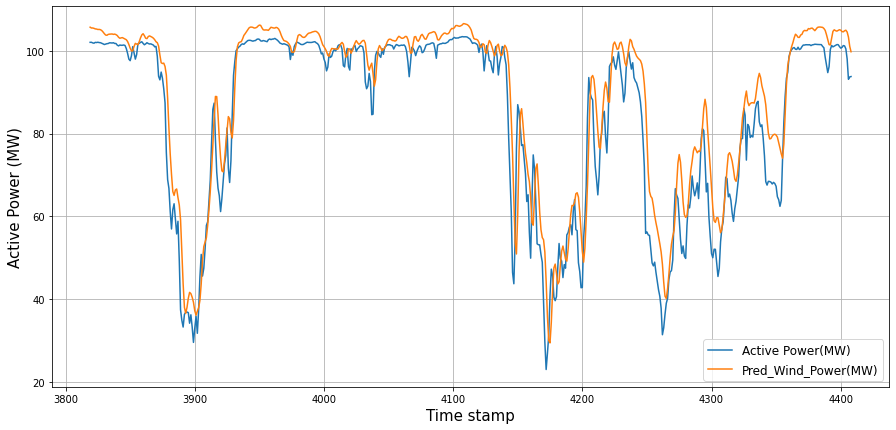

In [135]:

df_final[['Active Power(MW)','Pred_Wind_Power(MW)']].plot(figsize=(15,7))
plt.ylabel("Active Power (MW)", fontsize=15)
plt.xlabel("Time stamp", fontsize=15)
plt.grid()
plt.legend(loc='lower right',prop={"size":12})
# plt.title('Actual vs Predicted',fontname="Meiryo", fontsize=20,)


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
MSE=mean_squared_error(df_final['Active Power(MW)'],df_final['Pred_Wind_Power(MW)'])
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

actual = df_final['Active Power(MW)']
pred = df_final['Pred_Wind_Power(MW)']

MAPE=mape(actual, pred)

In [ ]:
print('MSE = '+ str(MSE))
print('MAPE = '+ str(MAPE))